In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset

In [2]:
torch.cuda.is_available()

True

## Loading X_i  and Temperature 

In [3]:
X = pd.read_csv('finalsmol.csv')

In [4]:
X.head(5)

,T,H2,O2,H2O,OH,HO2,H2O2,H,O,N2,...,w H2,w O2,w H2O,w OH,w HO2,w H2O2,w H,w O,w N2,w Ar
0,3651.907313,26.019801,60.437219,254.692651,60.217791,0.233046,2.474172e-02,12.811078,16.318481,354.463564,...,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0
1,4894.965266,56.312144,0.578096,7.743824,11.479244,0.004017,2.180146e-04,113.878143,11.817845,195.941569,...,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0
2,4617.686928,18.110285,88.257319,43.030563,76.624376,0.333806,1.231833e-02,47.158080,102.992481,41.348501,...,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0
3,2264.496476,0.128963,0.033197,4.378581,0.048670,0.000006,7.631055e-07,0.009569,0.002380,0.020255,...,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0
4,2936.051117,0.021012,0.019395,0.081576,0.023190,0.000003,7.205931e-08,0.019507,0.012721,3.847080,...,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0


In [5]:
X.shape

(2050000, 21)

In [6]:
col_names_my = {'H2': 'X1', 'O2': 'X2', 'H2O': 'X3', 'OH': 'X4', 'HO2': 'X5', 'H2O2': 'X6', 'H': 'X7',
                'O': 'X8', 'N2': 'X9', 'Ar': 'X10', 
                'w H2': 'w1', 'w O2': 'w2', 'w H2O': 'w3', 'w OH': 'w4',
                'w HO2': 'w5', 'w H2O2': 'w6', 'w H': 'w7', 'w O': 'w8','w N2': 'w9', 'w Ar': 'w10'}

In [7]:
X.rename(columns = col_names_my, inplace = True)

In [8]:
y = X.iloc[:, 11:].copy()
y.head(5)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0


In [9]:
X.drop(list(X.columns)[11:], axis = 1, inplace = True)
# X.drop(list(X.columns)[0], axis = 1, inplace = True)
X.head(5)

,T,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,3651.907313,26.019801,60.437219,254.692651,60.217791,0.233046,2.474172e-02,12.811078,16.318481,354.463564,0.485667
1,4894.965266,56.312144,0.578096,7.743824,11.479244,0.004017,2.180146e-04,113.878143,11.817845,195.941569,0.571799
2,4617.686928,18.110285,88.257319,43.030563,76.624376,0.333806,1.231833e-02,47.158080,102.992481,41.348501,0.011138
3,2264.496476,0.128963,0.033197,4.378581,0.048670,0.000006,7.631055e-07,0.009569,0.002380,0.020255,0.448616
4,2936.051117,0.021012,0.019395,0.081576,0.023190,0.000003,7.205931e-08,0.019507,0.012721,3.847080,0.001065


## Data distribution plots

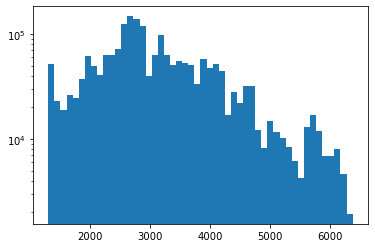

In [10]:
X_col = list(X.columns)
n, bins, patches = plt.hist(X[X_col.pop(0)], bins = 50, log=True)

In [11]:
# fig, axes = plt.subplots(2, 5)
# fig.set_figheight(5)
# fig.set_figwidth(15)
# for i in range(2):
#     for j in range(5):
#         axes[i, j].hist(X[X_col.pop(0)], bins = 50, log=True)
# plt.subplots_adjust(wspace=0.4, hspace=0.2)

## Loading w_i

In [12]:
# y = pd.read_csv('y_train.csv')

In [13]:
#y.tail(15)

## Checking for compliance with the conservation law 

In [14]:
res1 = []
res2 = []
A = np.array([2, 0, 2, 1, 1, 2, 1, 0, 0, 0]) 
B = np.array([0, 2, 1, 1, 2, 2, 0, 1, 0, 0])
for i in range(10000):
    w = np.array(y.iloc[i])
    res1.append(np.dot(A, w))
    res2.append(np.dot(A, w))

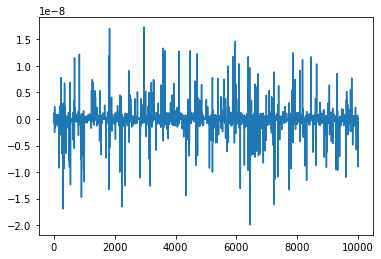

In [15]:
plt.plot(res1)

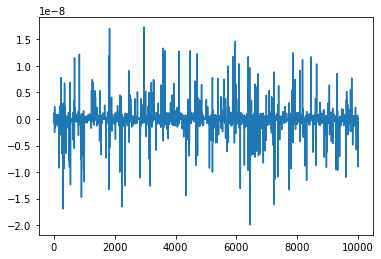

In [16]:
plt.plot(res2)

## Data distribution plots

In [17]:
col_drop = list(y.columns)

In [18]:
# y_col = list(y.columns)
# fig, axes = plt.subplots(2, 5)
# fig.set_figheight(5)
# fig.set_figwidth(15)
# for i in range(2):
#     for j in range(5):
#         axes[i, j].hist(y[y_col.pop(0)], bins = 50, log=True)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [19]:
y.describe()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
count,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2.050000e+06,2050000.0,2050000.0
mean,-2.662693e-01,-4.967058e-01,2.737485e+00,1.861955e-01,-3.040462e-02,-2.359120e-01,-4.626399e+00,-1.397636e+00,0.0,0.0
std,3.732465e+01,2.541317e+01,4.572807e+01,3.004695e+01,2.235526e+00,8.852719e+00,5.245679e+01,3.846296e+01,0.0,0.0
min,-9.997406e+02,-9.896512e+02,-9.997891e+02,-9.998430e+02,-9.649920e+02,-9.431292e+02,-9.998775e+02,-9.999944e+02,0.0,0.0
25%,-2.285885e-05,-2.203686e-06,-5.989531e-06,-4.185578e-06,-2.088126e-06,-3.908057e-07,-5.410636e-05,-2.990849e-05,0.0,0.0
50%,-4.443024e-11,-1.095367e-14,2.657856e-10,1.017547e-10,-1.018345e-11,-1.429196e-12,-1.588345e-10,-1.037464e-10,0.0,0.0
75%,2.399222e-05,1.680991e-06,2.448983e-05,1.182187e-04,2.189881e-08,1.601819e-08,8.405186e-06,6.462387e-06,0.0,0.0
max,7.324594e+02,7.374006e+02,9.986642e+02,9.865010e+02,1.255518e+02,4.012987e+02,9.962275e+02,9.982350e+02,0.0,0.0


# Adding columns with signs

In [20]:
col_s = []
for i in range(1,11):
    y['s{}'.format(i)] = np.sign(y['w{}'.format(i)]) #* (np.abs(y['w{}'.format(i)]) > 1)
    col_s.append('s{}'.format(i))
y.head(5)  

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0


# Data normalization

In [21]:
def prepare_data_w(Mas, eps = 1e-12):
    return np.where(np.abs(Mas) < eps, np.abs(Mas)/eps, 1 + np.log(np.abs(Mas)/eps))

In [22]:
for i in range(1,11):
    y['l{}'.format(i)] = prepare_data_w(y['w{}'.format(i)])
y.head(5)

C:\Users\user\.conda\envs\my_envtorch\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\.conda\envs\my_envtorch\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,...,19.291833,16.300422,19.554826,19.381569,18.113355,18.251710,19.176787,15.103433,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,...,18.342057,14.186045,17.719184,19.058000,12.002758,10.756519,18.369124,18.772890,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,...,20.772746,17.748882,19.721598,19.258305,17.144237,14.872365,20.820548,20.451551,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,...,31.561558,30.700349,31.813092,30.630732,22.897447,20.182057,29.833169,28.484581,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,...,31.748013,30.579577,32.617149,31.237441,21.523514,19.425411,32.522518,31.898954,0.0,0.0


In [23]:
y.replace(-np.inf, 0, inplace = True)
y.replace(-0, 0, inplace = True)

# for col in col_s: #for cross entropy 
#     y[col].replace(-1, 2, inplace = True)  ##change -1 for 2

# y.drop(col_drop, axis = 1, inplace = True) #for 3 loss function we dont drop Wi

y.head(5)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-0.000088,-4.414575e-06,0.000114,-0.000096,2.705426e-05,-3.106866e-05,0.000078,-0.000001,0.0,0.0,...,19.291833,16.300422,19.554826,19.381569,18.113355,18.251710,19.176787,15.103433,0.0,0.0
1,-0.000034,5.328767e-07,-0.000018,0.000070,-6.003952e-08,1.726643e-08,0.000035,-0.000052,0.0,0.0,...,18.342057,14.186045,17.719184,19.058000,12.002758,10.756519,18.369124,18.772890,0.0,0.0
2,0.000387,-1.879088e-05,-0.000135,-0.000085,-1.026486e-05,-1.058502e-06,-0.000405,0.000280,0.0,0.0,...,20.772746,17.748882,19.721598,19.258305,17.144237,14.872365,20.820548,20.451551,0.0,0.0
3,18.737682,7.919502e+00,-24.096603,7.386922,3.235493e-03,2.141220e-04,3.327256,0.863778,0.0,0.0,...,31.561558,30.700349,31.813092,30.630732,22.897447,20.182057,29.833169,28.484581,0.0,0.0
4,22.578367,7.018544e+00,-53.845981,13.550452,8.189336e-04,-1.004742e-04,48.984158,26.257004,0.0,0.0,...,31.748013,30.579577,32.617149,31.237441,21.523514,19.425411,32.522518,31.898954,0.0,0.0


In [24]:
# y_col = list(y.drop(col_drop, axis = 1).columns)
# fig, axes = plt.subplots(4, 5)
# fig.set_figheight(10)
# fig.set_figwidth(15)
# for i in range(4):
#     for j in range(5):
#         axes[i, j].hist(y[y_col.pop(0)], bins = 50, log=True)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [25]:
y.head(10)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,-8.791080e-05,-4.414575e-06,1.143559e-04,-9.616432e-05,2.705426e-05,-3.106866e-05,7.835712e-05,-1.333654e-06,0.0,0.0,...,19.291833,16.300422,19.554826,19.381569,18.113355,18.251710,19.176787,15.103433,0.0,0.0
1,-3.400631e-05,5.328767e-07,-1.824103e-05,6.958084e-05,-6.003952e-08,1.726643e-08,3.493936e-05,-5.232001e-05,0.0,0.0,...,18.342057,14.186045,17.719184,19.058000,12.002758,10.756519,18.369124,18.772890,0.0,0.0
2,3.865398e-04,-1.879088e-05,-1.351098e-04,-8.501219e-05,-1.026486e-05,-1.058502e-06,-4.054661e-04,2.803504e-04,0.0,0.0,...,20.772746,17.748882,19.721598,19.258305,17.144237,14.872365,20.820548,20.451551,0.0,0.0
3,1.873768e+01,7.919502e+00,-2.409660e+01,7.386922e+00,3.235493e-03,2.141220e-04,3.327256e+00,8.637778e-01,0.0,0.0,...,31.561558,30.700349,31.813092,30.630732,22.897447,20.182057,29.833169,28.484581,0.0,0.0
4,2.257837e+01,7.018544e+00,-5.384598e+01,1.355045e+01,8.189336e-04,-1.004742e-04,4.898416e+01,2.625700e+01,0.0,0.0,...,31.748013,30.579577,32.617149,31.237441,21.523514,19.425411,32.522518,31.898954,0.0,0.0
5,1.825007e+00,-6.198862e-03,-3.000717e-04,4.228757e-02,6.472828e-09,1.523523e-08,-3.691702e+00,-2.958982e-02,0.0,0.0,...,29.232605,23.547632,20.519532,25.467759,9.775368,10.631366,29.937109,25.110696,0.0,0.0
6,-2.665445e-04,1.205653e-06,1.520470e-04,3.185179e-05,5.426107e-05,-5.835189e-05,2.595859e-04,-1.781285e-04,0.0,0.0,...,20.401052,15.002532,19.839700,18.276604,18.809318,18.882002,20.374598,19.998016,0.0,0.0
7,-2.062268e-06,5.430671e-07,9.313917e-07,-1.377671e-10,4.085176e-07,-3.569882e-07,2.567350e-06,-2.120447e-06,0.0,0.0,...,15.539317,14.204988,14.744435,5.925565,13.920290,13.785458,15.758385,15.567137,0.0,0.0
8,-1.578228e-07,-5.206298e-08,2.959347e-07,-3.931808e-07,3.498772e-10,9.970706e-10,1.146130e-07,1.986782e-07,0.0,0.0,...,12.969228,11.860209,13.597894,13.882025,6.857582,7.904822,12.649317,13.199442,0.0,0.0
9,3.805757e-05,-3.412824e-06,-1.466647e-05,-2.537047e-05,-1.912873e-05,1.959361e-05,-4.147021e-05,4.593283e-05,0.0,0.0,...,18.454610,16.043051,17.501074,18.049097,17.766702,17.790714,18.540486,18.642691,0.0,0.0


In [26]:
save_cols = y.columns

In [27]:
X.shape

(2050000, 11)

In [28]:
y.shape

(2050000, 30)

In [29]:
X_train = X[0:2000000].to_numpy().copy() #пока беру 500.000
y_train = y[0:2000000].to_numpy().copy()
X_val = X[2000000:2025000].to_numpy().copy()
y_val = y[2000000:2025000].to_numpy().copy()
X_test = X[2025000:2050000].to_numpy().copy()
y_test = y[2025000:2050000].to_numpy().copy()

In [30]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2000000, 11)
(25000, 11)
(25000, 11)


In [31]:
X_train

array([[3.65190731e+03, 2.60198008e+01, 6.04372186e+01, ...,
        1.63184806e+01, 3.54463564e+02, 4.85667260e-01],
       [4.89496527e+03, 5.63121437e+01, 5.78096451e-01, ...,
        1.18178445e+01, 1.95941569e+02, 5.71799430e-01],
       [4.61768693e+03, 1.81102850e+01, 8.82573189e+01, ...,
        1.02992481e+02, 4.13485006e+01, 1.11381945e-02],
       ...,
       [2.59817250e+03, 2.11836494e-02, 6.28567121e-03, ...,
        1.01874880e-03, 1.30034160e-03, 3.60007635e-02],
       [2.59678380e+03, 4.55572218e-02, 1.63912156e-01, ...,
        7.30656324e-02, 1.64788827e-01, 3.57995190e-03],
       [1.97054033e+03, 5.61139293e+00, 6.23812268e-08, ...,
        4.74134141e-06, 3.54332589e-01, 5.76516768e-02]])

# Data normalization

In [32]:
def prepare_data(Mas, eps = 1e-12):
    return np.where(Mas < eps, Mas/eps, 1 + np.log(Mas/eps))

def prepare_data_T(Mas):
    return Mas/100

In [33]:
X_train[:, 1:11] = prepare_data(X_train[:, 1:11]).copy()
X_val[:, 1:11] = prepare_data(X_val[:, 1:11]).copy()
X_test[:, 1:11] = prepare_data(X_test[:, 1:11]).copy()

X_train[:, 0] = prepare_data_T(X_train[:, 0]).copy()
X_val[:, 0] = prepare_data_T(X_val[:, 0]).copy()
X_test[:, 0] = prepare_data_T(X_test[:, 0]).copy()

In [34]:
X_train

array([[36.51907313, 31.88987893, 32.73262623, ..., 31.42331936,
        34.50162668, 27.90878958],
       [48.94965266, 32.66193132, 28.08300656, ..., 31.10063175,
        33.90883761, 28.07205412],
       [46.17686928, 31.52750113, 33.11127774, ..., 33.2656771 ,
        32.35305728, 24.13364598],
       ...,
       [25.98172504, 24.77649547, 23.56153847, ..., 21.74184104,
        21.98589284, 25.30680598],
       [25.96783796, 25.542235  , 26.82259649, ..., 26.01462395,
        26.82793065, 22.9986152 ],
       [19.70540332, 30.3558201 , 12.04101966, ..., 16.37183065,
        27.59350183, 25.77768517]])

In [35]:
X_train = torch.from_numpy(X_train).float().cuda()
y_train = torch.from_numpy(y_train).float().cuda()
X_val = torch.from_numpy(X_val).float().cuda()
y_val = torch.from_numpy(y_val).float().cuda()
X_test = torch.from_numpy(X_test).float().cuda()
y_test = torch.from_numpy(y_test).float().cuda()

In [36]:
X_train

tensor([[36.5191, 31.8899, 32.7326,  ..., 31.4233, 34.5016, 27.9088],
        [48.9497, 32.6619, 28.0830,  ..., 31.1006, 33.9088, 28.0721],
        [46.1769, 31.5275, 33.1113,  ..., 33.2657, 32.3531, 24.1336],
        ...,
        [25.9817, 24.7765, 23.5615,  ..., 21.7418, 21.9859, 25.3068],
        [25.9678, 25.5422, 26.8226,  ..., 26.0146, 26.8279, 22.9986],
        [19.7054, 30.3558, 12.0410,  ..., 16.3718, 27.5935, 25.7777]],
       device='cuda:0')

In [37]:
y_train

tensor([[-8.7911e-05, -4.4146e-06,  1.1436e-04,  ...,  1.5103e+01,
          0.0000e+00,  0.0000e+00],
        [-3.4006e-05,  5.3288e-07, -1.8241e-05,  ...,  1.8773e+01,
          0.0000e+00,  0.0000e+00],
        [ 3.8654e-04, -1.8791e-05, -1.3511e-04,  ...,  2.0452e+01,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 8.4063e+00,  3.6563e+00, -1.1561e+01,  ...,  2.8539e+01,
          0.0000e+00,  0.0000e+00],
        [-1.9062e+01, -2.3172e+01,  4.0379e+01,  ...,  3.2437e+01,
          0.0000e+00,  0.0000e+00],
        [ 8.3748e+01, -1.6294e-04,  3.5255e-01,  ...,  2.4223e+01,
          0.0000e+00,  0.0000e+00]], device='cuda:0')

# OUR NET

In [38]:
class Net(torch.nn.Module):
    def __init__(self, slope):
        super().__init__()
        self.fc1 = torch.nn.Linear(11, 150)
        self.bn1 = nn.BatchNorm1d(num_features=150)
        self.relu1 = torch.nn.LeakyReLU(negative_slope = slope)  
        
        self.fc2 = torch.nn.Linear(150, 170)
        self.bn2 = nn.BatchNorm1d(num_features=170)
        self.relu2 = torch.nn.LeakyReLU(negative_slope = slope)
        
        self.fc3 = torch.nn.Linear(170, 190)
        self.bn3 = nn.BatchNorm1d(num_features=190)
        self.relu3 = torch.nn.LeakyReLU(negative_slope = slope)
        
        self.fc4 = torch.nn.Linear(190, 190)
        self.bn4 = nn.BatchNorm1d(num_features=190)
        self.relu4 = torch.nn.LeakyReLU(negative_slope = slope)
        
        self.fc51 = torch.nn.Linear(190, 10)
#         self.relu41 = torch.nn.LeakyReLU(negative_slope = slope) #linear
        
        self.fc52 = torch.nn.Linear(190, 10)
        self.tanh52 = torch.nn.Tanh()
        
    
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu3(out)
    
        out = self.fc4(out)
        out = self.bn4(out)
        out = self.relu4(out)
        
        out1 = self.fc51(out)
        
        out2 = self.fc52(out)
        out2 = self.tanh52(out2)

        return out1, out2

In [39]:
# import random
# RANDOM_SEED = 5
# torch.manual_seed(RANDOM_SEED)
# torch.cuda.manual_seed(RANDOM_SEED)
# torch.cuda.manual_seed_all(RANDOM_SEED)
# np.random.seed(RANDOM_SEED)
# random.seed(RANDOM_SEED)

In [40]:
train_data = TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=250, shuffle = True)
save_cols

Index(['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 's1', 's2',
       's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6', 'l7', 'l8', 'l9', 'l10'],
      dtype='object')

In [41]:
model = Net(0.15).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True) #обновление лернингрейта

## Custom loss function


In [42]:
def reverse_norm_w(Mas, eps = 1e-12):
    """
    reverse normalization for w_i
    """
    return torch.where(torch.abs(Mas)<20, torch.exp(torch.abs(Mas)-1)*eps, 
                       eps*torch.exp(torch.tensor([20. - 1]).cuda())*(torch.abs(Mas) - 20. + 1))

In [43]:
H = torch.tensor([2., 0., 2., 1., 1., 2., 1., 0., 0., 0.]).cuda()
O = torch.tensor([0., 2., 1., 1., 2., 2., 0., 1., 0., 0.]).cuda()

CE_mem = []
MSE_mem = []
LH_mem = []
LO_mem = []

def loss_function(y_pred_l, y_pred_s, y_batch):
    """
    my custom loss function
    """
    MSE = nn.MSELoss()(y_pred_l, y_batch[:, 20:30])

    A = torch.log((1 + y_pred_s)/2 + 1e-10) #problem solved +eps -inf*0=nan
    B = torch.log((1 - y_pred_s)/2 + 1e-10)
    CE1 = torch.mul(torch.pow(y_batch[:, 10:20], 2) * (1 + y_batch[:, 10:20]), A)
    CE2 = torch.mul(torch.pow(y_batch[:, 10:20], 2) * (1 - y_batch[:, 10:20]), B)
    
    CE = CE1 + CE2
    CE = torch.sum(CE, 1)
    CE = -(CE)/2
    CE = torch.mean(CE)
  
    temp = torch.mul(torch.sign(y_pred_s), reverse_norm_w(y_pred_l)) #sign(s_i) * e^y_i не матричное умножение #
    MAX = torch.max(torch.abs(y_batch[:, 0:10]), 1)[0]
    
    LO = torch.mean(torch.abs(torch.matmul(temp, O))/(MAX + 1)) #problem solved +1 X/MAX=nan
    LH = torch.mean(torch.abs(torch.matmul(temp, H))/(MAX + 1))
    
        
    MSE_mem.append(MSE.item())
    CE_mem.append(CE.item())
    LH_mem.append(LH.item())
    LO_mem.append(LO.item())
    
    
#     print('---------------------------------')
#     print('MSE metric {}'.format(MSE))
#     print('CE metric {}'.format(CE))  
#     print('LH metric {}'.format(LH))
#     print('LO metric {}'.format(LO))
#     print('---------------------------------')
    
    return MSE + CE + LH + LO

In [44]:
# model.eval()
# for x_batch, y_batch in train_loader: #for test loss function
#     y_pred_l, y_pred_s = model.forward(x_batch)
# #     print('y_pred_l is {}'.format(reverse_norm_w(y_pred_l)))
# #     print('y_pred_s is {}'.format(y_pred_s))
#     print('y_batch is {}'.format(y_batch[:, 0:10]))
#     loss = loss_function(y_pred_l, y_pred_s, y_batch)
#     print(loss)
#     break

In [45]:
epoch_num = 1000
loss_history = [] 
for epoch in range(epoch_num):
    
        
    loss_mean = []
    for x_batch, y_batch in train_loader:  
        
        optimizer.zero_grad() 
        
        y_pred_l, y_pred_s = model.forward(x_batch)
#         for param in model.parameters():
#             print(param.data)
#         print('y_pred_l is {}'.format(y_pred_l))
#         print('y_batch is {}'.format(y_batch[:, 20:30]))

#         with torch.autograd.detect_anomaly(): #ловит нан в градиентах
        loss = loss_function(y_pred_l, y_pred_s, y_batch)
        loss_mean.append(loss.item())
        loss.backward()  
            
        optimizer.step() 
    
#     model.eval()
#     y_p_l, y_p_s = model.forward(X_val)
#     validate = loss_function(y_p_l, y_p_s, y_val)
    
    scheduler.step(np.mean(loss_mean))
    print(epoch, 
          np.mean(loss_mean), 
          np.std(loss_mean),
          np.median(loss_mean))
#           np.linalg.norm(y_batch.detach().numpy()), 
#           np.linalg.norm(y_pred.detach().numpy()))
    
    loss_history.append(np.mean(loss_mean))

0 14.817657084941864 5.120964665467104 14.284138202667236
1 12.960505484879016 2.0019574781095093 12.814404010772705
2 12.499829066038131 1.9767192653458745 12.341522693634033
3 12.246546652257443 1.9409762971941567 12.089699745178223
4 12.084146314799785 1.9174766786586155 11.966782569885254
5 11.9800998544693 1.9200661089531166 11.83743143081665
6 11.853009527921676 1.8965474084475744 11.705603122711182
7 11.778583069086075 1.8750961037914804 11.647459506988525
8 11.691046303927898 1.8783281320993266 11.535065174102783
9 11.616267236471176 1.862146306819807 11.460958480834961
10 11.552515789389611 1.8831329401575054 11.407935619354248
11 11.519857250511647 1.839097094785499 11.390047550201416
12 11.4618908187747 1.819739547056673 11.331255912780762
13 11.432833016872406 1.8458647663410628 11.292067527770996
14 11.398865444302558 1.8637278588609412 11.236703395843506
15 11.36350502604246 1.870279322193124 11.224496364593506
16 11.312729969620705 1.836719081380934 11.166194915771484
17

139 10.321687495052814 1.7354069305858606 10.179013729095459
140 10.299028024375438 1.733373504292644 10.157070636749268
141 10.310291142523289 1.6801711186408104 10.199971199035645
142 10.290034412443639 1.7490175335764782 10.124411582946777
143 10.299949473321437 1.739497521903494 10.137516498565674
144 10.281950651109218 1.7271213669542242 10.142601013183594
145 10.283312925815583 1.697557141504647 10.148686408996582
146 10.297372901439667 1.7008925975475608 10.159783363342285
147 10.283960938155651 1.6909981107886205 10.123040199279785
148 10.272678190290929 1.7313244570957402 10.145210266113281
149 10.2790101211071 1.7222961733790714 10.159867763519287
150 10.282728256702423 1.7232364537530707 10.143026351928711
151 10.269759839296341 1.6977498153906119 10.126680374145508
152 10.270573741674424 1.713724340092036 10.131120204925537
153 10.258089514911175 1.711804924622026 10.112843036651611
154 10.273299210369586 1.728828636798792 10.134330749511719
155 10.27491657179594 1.72065142

270 9.318916542470456 1.629622061521368 9.17262601852417
271 9.319233152925968 1.6065661351199734 9.206201076507568
272 9.3149498398304 1.6293730921966711 9.14796495437622
273 9.324474776208401 1.6250322472063852 9.208109378814697
274 9.31697239971161 1.6047880920379904 9.192221641540527
275 9.321025906682014 1.6029264894465138 9.188607215881348
276 9.31335712391138 1.5980095943969757 9.187375545501709
277 9.326368433356285 1.5951667596254206 9.203314304351807
278 9.322788531064987 1.6278760247358228 9.185710906982422
279 9.31940579086542 1.607904879962398 9.1677885055542
280 9.32794201695919 1.601819422271358 9.192128658294678
281 9.326969441056251 1.6217251560458303 9.216471195220947
282 9.32522203373909 1.6334218416533342 9.187599182128906
283 9.324589677155018 1.6098793520870966 9.180847644805908
284 9.323280322372913 1.6221355329459952 9.163461208343506
285 9.317689560830592 1.6085923027013176 9.156935691833496
286 9.32203560090065 1.6190154124498561 9.176582336425781
287 9.317723

411 9.32262647473812 1.6133605411968541 9.16825008392334
412 9.319450835347176 1.6013903372017868 9.167630195617676
413 9.320026313066483 1.5752469202590371 9.168899059295654
414 9.320663419425488 1.613269947870873 9.18541145324707
415 9.316887011170387 1.6388983696525294 9.170482635498047
416 9.31978895932436 1.593685984275192 9.196012496948242
417 9.320291027486324 1.5986634242404723 9.18245553970337
418 9.324568503558636 1.5975265413616675 9.209147453308105
419 9.322710520267487 1.6148860557014986 9.165457248687744
420 9.32635394001007 1.6223044629835064 9.194127559661865
421 9.329293823361397 1.6029704814412087 9.18587875366211
422 9.324650959014892 1.6196271570393106 9.171027183532715
423 9.328384400308131 1.6281411762173812 9.199157238006592
424 9.323170091807842 1.5990643296164944 9.18146276473999
425 9.321093807399272 1.6018899045589747 9.177929878234863
426 9.312178875267506 1.6306824911199462 9.162109851837158
427 9.330503617703915 1.634858384259434 9.181037902832031
428 9.32

552 9.316030845165253 1.5837258224957145 9.1991548538208
553 9.335892284691333 1.605711088198961 9.19575834274292
554 9.328200039088726 1.6277196615695173 9.169015884399414
555 9.321540297508239 1.6135650870785214 9.188076972961426
556 9.328321423828601 1.5943161621509518 9.195888042449951
557 9.312872140228748 1.6276495107168998 9.171235084533691
558 9.326387450516224 1.6083623989282354 9.182538509368896
559 9.320552124261855 1.6046752319851114 9.173421382904053
560 9.333717660665512 1.6214113469264686 9.173893928527832
561 9.318348609566689 1.6234764071835552 9.168482303619385
562 9.317739853203296 1.6312353025057507 9.180970191955566
563 9.317246387600898 1.6153644546633898 9.1570725440979
564 9.320265443980693 1.6142129439171256 9.177873611450195
565 9.32341716349125 1.6222509416344784 9.171067714691162
566 9.32272974574566 1.6118615178300097 9.185560703277588
567 9.317344439148902 1.6186909457727583 9.202279567718506
568 9.31921244841814 1.6104030789754935 9.159760475158691
569 9.

693 9.319716031968593 1.6092723427335387 9.162081241607666
694 9.321032716870308 1.614898232564591 9.171007633209229
695 9.323196241080762 1.6042076104601615 9.180240154266357
696 9.32998583716154 1.620405664567511 9.187950134277344
697 9.336413730859757 1.5961451764134837 9.19540786743164
698 9.327966867029668 1.6123671061517557 9.200558185577393
699 9.316553080677986 1.629126203008644 9.185576915740967
700 9.313990361571312 1.6359448867199804 9.177917957305908
701 9.320563288927078 1.601580364607622 9.18438196182251
702 9.321599566161632 1.5839869119392098 9.170971870422363
703 9.325525799274445 1.6228629903693579 9.159505367279053
704 9.31941617488861 1.6092393532276121 9.177980899810791
705 9.326437119841575 1.5986449886325151 9.178466796875
706 9.325559689581395 1.6048063557743317 9.16948127746582
707 9.31999524962902 1.6177421283978355 9.188413143157959
708 9.322703264892102 1.612921907858209 9.184225082397461
709 9.324494298756123 1.6270400499899405 9.171854496002197
710 9.32855

834 9.317257339656352 1.6038518369389567 9.176121234893799
835 9.323776096224785 1.6373482648786855 9.172483444213867
836 9.323483940839768 1.633411256948764 9.176578044891357
837 9.318599375247956 1.6057808586260585 9.172321796417236
838 9.31985649061203 1.6310309790716215 9.180644512176514
839 9.322385265171528 1.6020901555011182 9.18949556350708
840 9.321750995993614 1.6224213302824184 9.165331840515137
841 9.318471633553505 1.6120029991237013 9.178705215454102
842 9.320485378205776 1.6047587351444752 9.178108215332031
843 9.324491009891034 1.6428656646762068 9.167766571044922
844 9.312331160724163 1.6033483845634044 9.177306175231934
845 9.327868284642696 1.6349017754162616 9.185716152191162
846 9.321778165042401 1.601586389165846 9.178682327270508
847 9.328635184705258 1.6108163729332334 9.165666103363037
848 9.321516837835311 1.6102166416153434 9.184494018554688
849 9.319428080618382 1.6234310617161092 9.191322326660156
850 9.321140893101692 1.6260990117445464 9.18545150756836
85

975 9.328219870746135 1.6247440035805958 9.209579944610596
976 9.321993395745753 1.5975249095014856 9.19853162765503
977 9.321177369058132 1.5954381289679436 9.177939891815186
978 9.312635303616524 1.615477565883245 9.165519714355469
979 9.31272549635172 1.6088466247424307 9.151998519897461
980 9.331855729341507 1.622691518411166 9.198259353637695
981 9.322760702967644 1.6319579058064997 9.170556545257568
982 9.31515471947193 1.6168274545122083 9.189807891845703
983 9.3187589443326 1.6184352603309826 9.15859317779541
984 9.31691180497408 1.6195488023539293 9.176525592803955
985 9.325805697321892 1.636315235470754 9.171848773956299
986 9.32869371074438 1.6174891590457714 9.170080184936523
987 9.323741527795791 1.6203264315388715 9.177019596099854
988 9.326083094120026 1.6243534126552093 9.178532600402832
989 9.31720651191473 1.638621469599139 9.189076900482178
990 9.323150134027005 1.639669831172463 9.158164501190186
991 9.316297592103481 1.631559910196048 9.173508644104004
992 9.326685

In [46]:
graph = [MSE_mem, CE_mem, LH_mem, LO_mem]

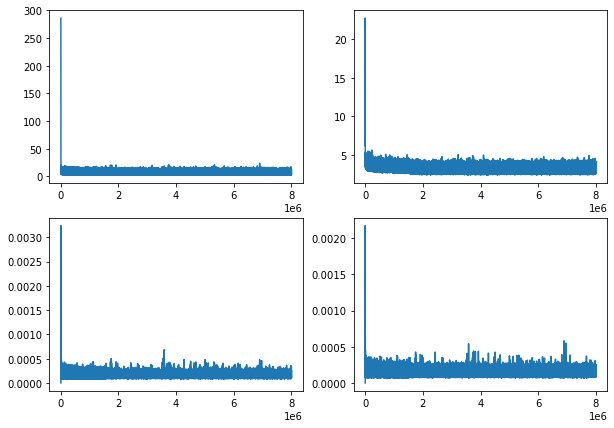

In [47]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
axes[0, 0].plot(graph[0])
axes[0, 1].plot(graph[1])
axes[1, 0].plot(graph[2])
axes[1, 1].plot(graph[3])
plt.subplots_adjust(wspace=0.2, hspace=0.2)

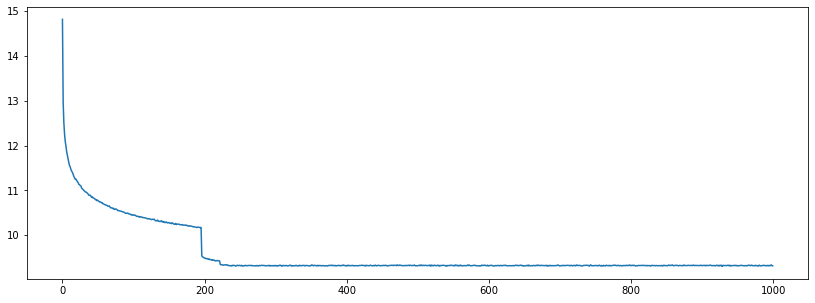

In [48]:
plt.figure(figsize = (14,5))
plt.plot(loss_history) #нейросеть номер 1
plt.show()

In [49]:
model.eval()
y_p_l, y_p_s = model.forward(X_val)
print(loss_function(y_p_l, y_p_s, y_val))

tensor(9.5442, device='cuda:0', grad_fn=<AddBackward0>)


якобианы и прочее

In [ ]:
x = torch.tensor([1., 2., 3.])
x.requires_grad_(True)
start = x
for i in range(3):
    y = torch.pow(5*x, 2)
    x = y

In [ ]:
start

In [ ]:
y

In [ ]:
y.backward(torch.eye(3))

In [ ]:
start.grad.data

In [ ]:
8*(5.**14)*torch.pow(start, 7)

In [ ]:
def get_jacobian(net, x, noutputs):
    x = x.squeeze()
    n = x.size()[0]
    x = x.repeat(noutputs, 1)
    x.requires_grad_(True)
    y = net(x)
    y.backward(torch.eye(noutputs))
    return x.grad.data